In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
original_df = pd.read_csv(r'C:\Users\tulik\Desktop\IGDTUW\ML\ML Lab\commodity-price-forecasting\dataset\commodity_futures.csv')
df = original_df.copy()
df.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,03-01-2000,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,04-01-2000,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,05-01-2000,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,06-01-2000,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,07-01-2000,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [4]:
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
6088,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
6089,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
6090,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [5]:
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# Reindex the DataFrame to include all dates in the range
df = df.set_index('Date').reindex(date_range).reset_index()

# Rename the index column back to 'Date'
df.rename(columns={'index': 'Date'}, inplace=True)

df.to_csv(r'C:\Users\tulik\Desktop\IGDTUW\ML\ML Lab\commodity-price-forecasting\dataset\commodity_futures_with alldates.csv', index=False)

In [6]:
df = df.ffill()
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
8611,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
8612,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
8613,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [7]:
df = df.bfill()
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,2.176,283.7,25.55,24.39,456.50,200.75,0.8480,5.375,213.50,...,1237.50,67.78,8446.0,247.50,6.10,188.88,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,188.88,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,188.88,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,188.88,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,188.88,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
8611,2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
8612,2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08
8613,2023-08-03,2.565,1932.0,81.55,85.14,1428.75,480.75,3.8995,23.697,899.50,...,2494.00,307.49,21402.0,627.00,24.02,276.47,164.75,101.000,767.50,85.28


In [8]:
df = df.set_index('Date')
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


df = df[df.applymap(is_numeric).all(axis=1)]

df.to_csv('final.csv')

C:\Users\tulik\AppData\Local\Temp\ipykernel_30368\2202947183.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df.applymap(is_numeric).all(axis=1)]


In [9]:
df = df[df.index.year >= 2023]
df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,4.475,1826.2,80.26,85.91,1519.25,678.50,3.8105,24.040,921.00,154.825,...,2990.25,336.22,29901.0,792.00,20.04,245.95,167.30,87.700,888.00,83.37
2023-01-02,4.475,1826.2,80.26,85.91,1519.25,678.50,3.8105,24.040,921.00,154.825,...,2990.25,336.22,29901.0,792.00,20.04,245.95,167.30,87.700,888.00,83.37
2023-01-03,3.988,1846.1,76.93,82.10,1487.25,670.50,3.7665,24.236,900.00,156.850,...,3018.75,308.65,30978.0,775.50,19.70,236.12,166.30,85.075,869.25,83.14
2023-01-04,4.172,1859.0,72.84,77.84,1478.25,653.75,3.7405,23.964,842.75,157.275,...,3012.50,297.19,29636.0,745.50,19.54,225.92,161.30,84.075,840.75,80.44
2023-01-05,3.720,1840.6,73.67,78.69,1466.75,652.75,3.8210,23.424,860.25,157.350,...,3023.75,297.23,27614.0,746.75,19.34,226.71,160.55,82.525,839.75,82.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,178.050,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,179.500,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,178.025,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08


<Figure size 1400x800 with 0 Axes>

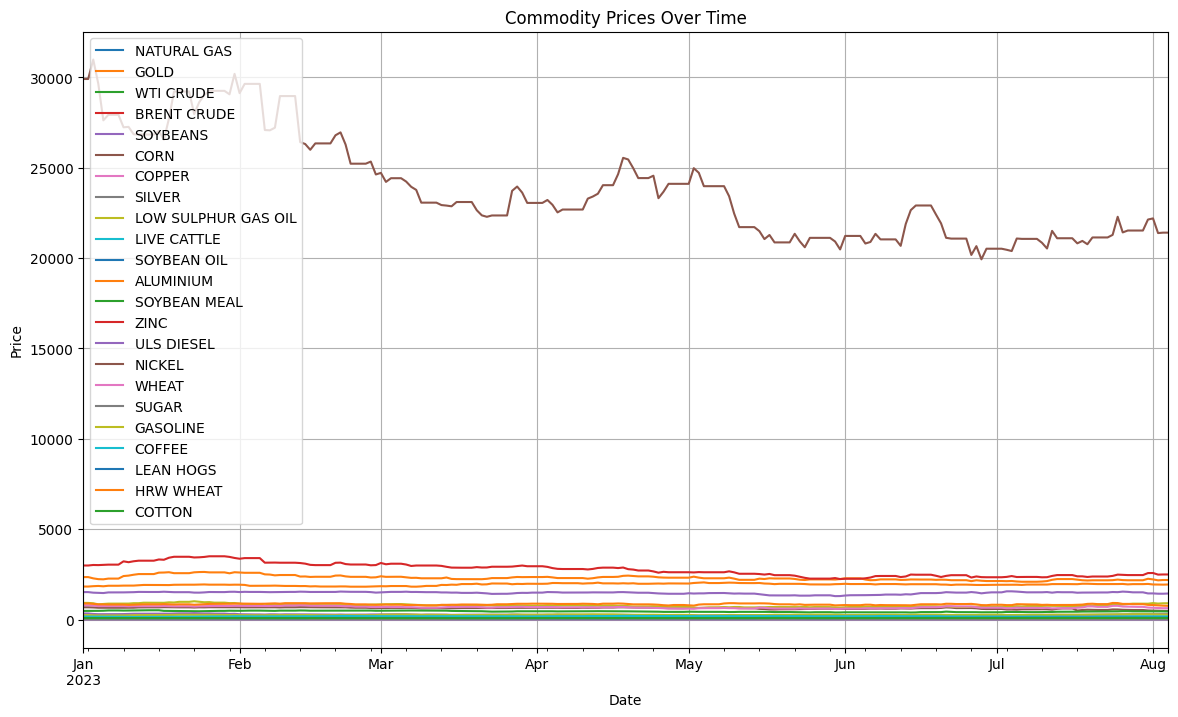

In [10]:
# Plot the closing price of all commodities over time
plt.figure(figsize=(14, 8))
df.plot(figsize=(14, 8))
plt.title('Commodity Prices Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

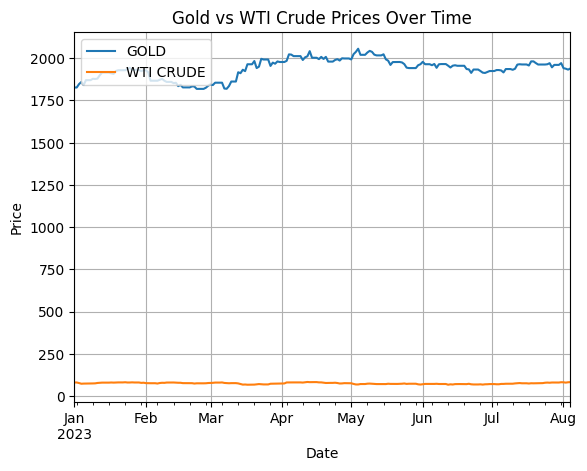

In [11]:
# Plot a few selected commodities (e.g., Gold and WTI Crude)
plt.figure(figsize=(14, 8))
df[['GOLD', 'WTI CRUDE']].plot()
plt.title('Gold vs WTI Crude Prices Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


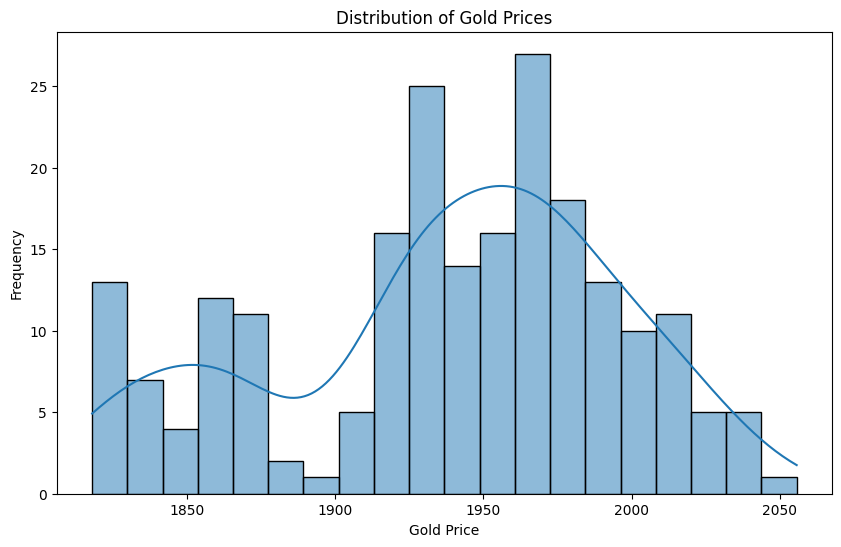

In [12]:
# Plot distribution of a commodity (e.g., Gold)
plt.figure(figsize=(10, 6))
sns.histplot(df['GOLD'], kde=True, bins=20)
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()


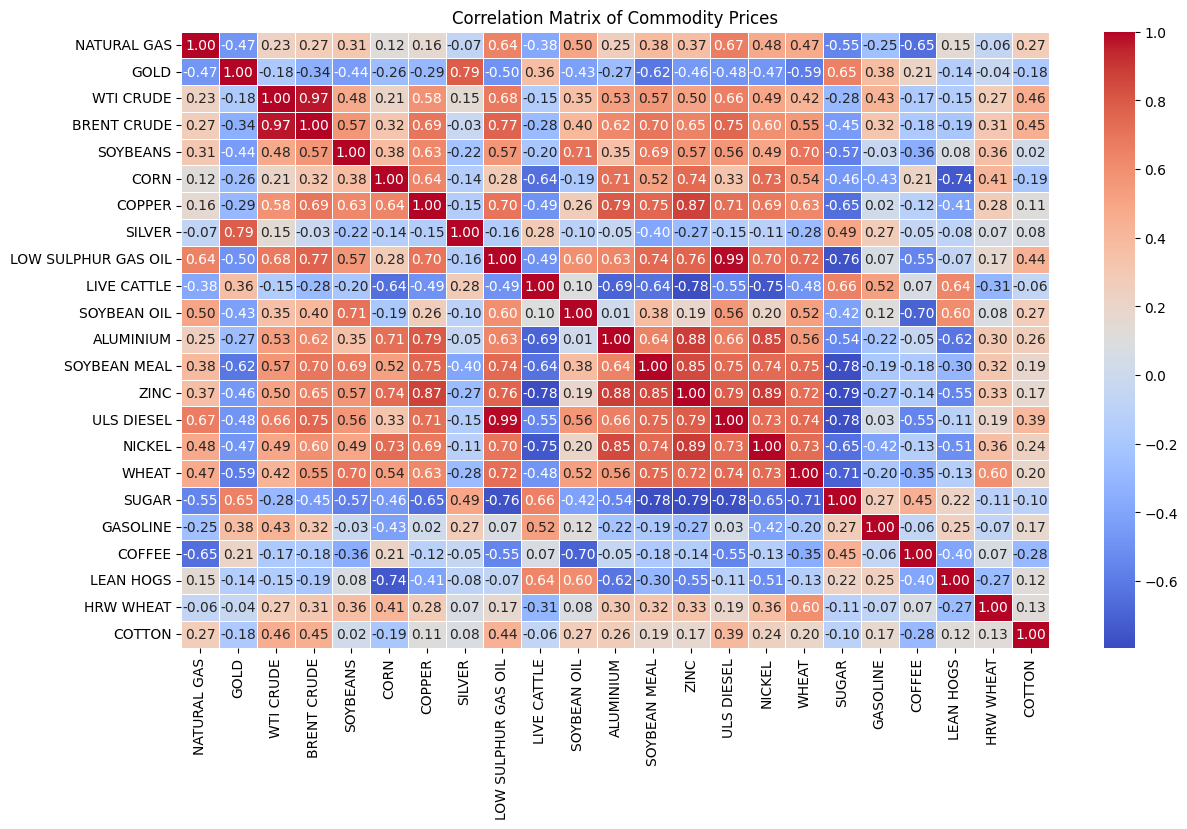

In [13]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Commodity Prices')
plt.show()


In [14]:

def feature_analysis(target_column, data):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Standardize the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # 1. Correlation
    correlations = X.corrwith(y).abs()
    top_corr_features = correlations[correlations > 0.6].index.tolist()

    # 2. Multicollinearity (VIF)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    top_vif_features = vif_data[vif_data['VIF'] < 5]['Feature'].tolist()

    # 3. Mutual Information Gain
    mi_scores = mutual_info_regression(X_scaled, y)
    mi_features = X.columns[mi_scores > np.mean(mi_scores)].tolist()

    # 4. K Best Features
    selector = SelectKBest(score_func=f_regression, k=5)
    selector.fit(X_scaled, y)
    k_best_features = X.columns[selector.get_support()].tolist()

    feature_counts = pd.Series(
        top_corr_features + top_vif_features + mi_features + k_best_features
    ).value_counts()
    selected_features = feature_counts[feature_counts >= 3].index.tolist()

    return {
        "Correlation": top_corr_features,
        "High Multicollinearity Features": top_vif_features,
        "Mutual Information": mi_features,
        "K Best Features": k_best_features,
        "Selected Features (>= 3 methods)": selected_features
    }, selected_features

# Example: Analyze features for a specific target column
target_column = 'SOYBEANS'  # Replace with your main column
result, selected_features = feature_analysis(target_column, df)

# Display results
for method, features in result.items():
    print(f"{method}: {features}")

Correlation: ['COPPER', 'SOYBEAN OIL', 'SOYBEAN MEAL', 'WHEAT']
High Multicollinearity Features: []
Mutual Information: ['CORN', 'SILVER', 'LOW SULPHUR GAS OIL', 'SOYBEAN OIL', 'SOYBEAN MEAL', 'ZINC', 'ULS DIESEL', 'WHEAT', 'SUGAR']
K Best Features: ['COPPER', 'SOYBEAN OIL', 'SOYBEAN MEAL', 'WHEAT', 'SUGAR']
Selected Features (>= 3 methods): ['SOYBEAN OIL', 'SOYBEAN MEAL', 'WHEAT']


<Figure size 1400x800 with 0 Axes>

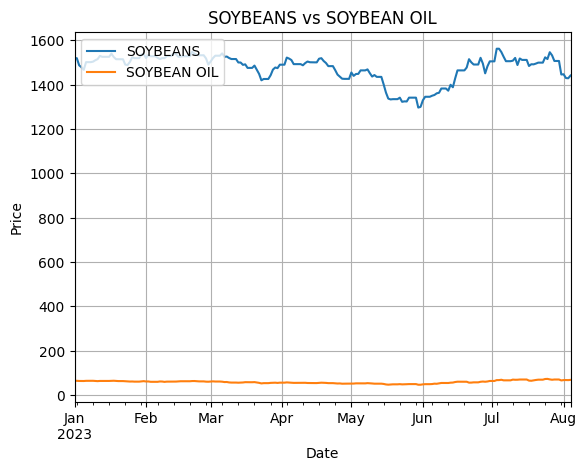

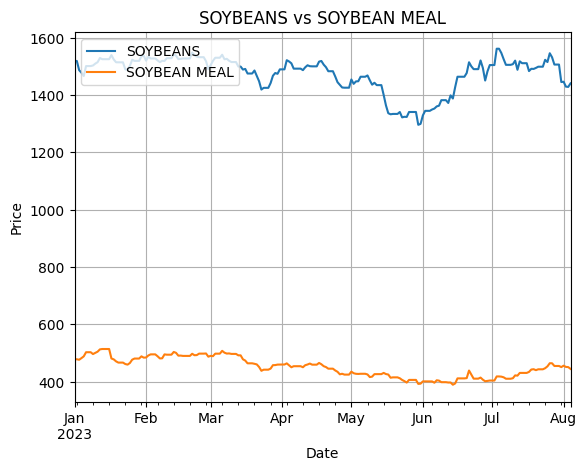

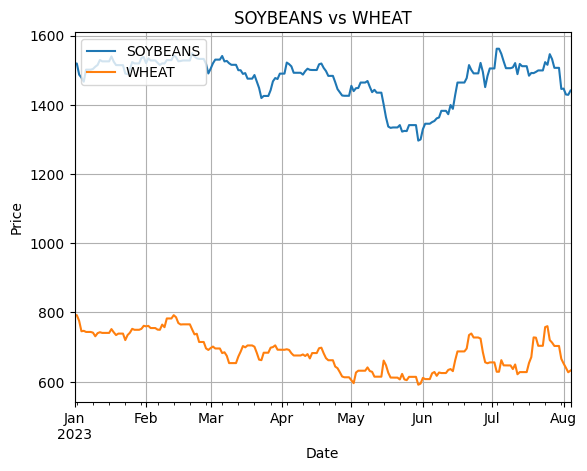

In [15]:
# Plot a few selected commodities (e.g., Gold and WTI Crude)
plt.figure(figsize=(14, 8))
for i in selected_features:
    df[[target_column, i]].plot()
    plt.title(f'{target_column} vs {i}')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [16]:
# from statsmodels.tsa.seasonal import seasonal_decompose


# analysis = df[[target_column]].copy()


# decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

# trend = decompose_result_mult.trend
# seasonal = decompose_result_mult.seasonal
# residual = decompose_result_mult.resid

# decompose_result_mult.plot()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

Best Model: XGBoost
Linear Regression: R²=0.6621, RMSE=37.4863
Random Forest: R²=0.9310, RMSE=16.9413
XGBoost: R²=0.9598, RMSE=12.9291


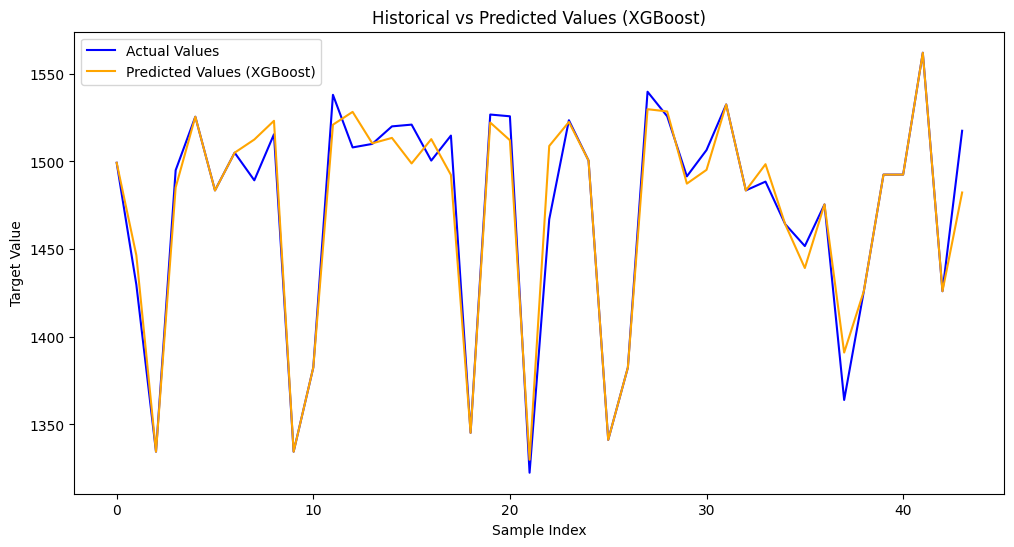

In [18]:
X = df[selected_features]
y = df[target_column]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {"R²": r2, "RMSE": rmse, "Predictions": y_pred}

# Select the best model (highest R²)
best_model_name = max(results, key=lambda x: results[x]["R²"])
best_model = models[best_model_name]
best_predictions = results[best_model_name]["Predictions"]

print(f"Best Model: {best_model_name}")
for model_name, metrics in results.items():
    print(f"{model_name}: R²={metrics['R²']:.4f}, RMSE={metrics['RMSE']:.4f}")

# Plot historical vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Values", color="blue")
plt.plot(best_predictions, label=f"Predicted Values ({best_model_name})", color="orange")
plt.title(f"Historical vs Predicted Values ({best_model_name})")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

In [19]:
from datetime import timedelta

In [20]:
forecast_period = 30

In [21]:
df['Shifted_Target'] = df[target_column].shift(-forecast_period)

df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON,Shifted_Target
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,4.475,1826.2,80.26,85.91,1519.25,678.50,3.8105,24.040,921.00,154.825,...,336.22,29901.0,792.00,20.04,245.95,167.30,87.700,888.00,83.37,1538.00
2023-01-02,4.475,1826.2,80.26,85.91,1519.25,678.50,3.8105,24.040,921.00,154.825,...,336.22,29901.0,792.00,20.04,245.95,167.30,87.700,888.00,83.37,1520.25
2023-01-03,3.988,1846.1,76.93,82.10,1487.25,670.50,3.7665,24.236,900.00,156.850,...,308.65,30978.0,775.50,19.70,236.12,166.30,85.075,869.25,83.14,1534.25
2023-01-04,4.172,1859.0,72.84,77.84,1478.25,653.75,3.7405,23.964,842.75,157.275,...,297.19,29636.0,745.50,19.54,225.92,161.30,84.075,840.75,80.44,1528.00
2023-01-05,3.720,1840.6,73.67,78.69,1466.75,652.75,3.8210,23.424,860.25,157.350,...,297.23,27614.0,746.75,19.34,226.71,160.55,82.525,839.75,82.58,1528.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,178.050,...,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44,NaN
2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,179.500,...,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87,NaN
2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,178.025,...,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08,NaN


In [22]:

train_data = df.dropna(subset=['Shifted_Target'])

# Test data starts where the shifted target becomes NaN
test_data = df[df['Shifted_Target'].isna()]

# Prepare training and test data
X_train = train_data.drop(columns=[target_column, 'Shifted_Target'])
y_train = train_data['Shifted_Target']

X_test = test_data.drop(columns=[target_column, 'Shifted_Target']).iloc[:forecast_period]
last_date = df.index[-1]

# Train a model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for test data
y_pred = model.predict(X_test)

# Generate future dates starting from the last known date
future_dates = [last_date + timedelta(days=i + 1) for i in range(len(y_pred))]

# Combine results into a DataFrame
results = pd.DataFrame({
    'Date': future_dates,
    f'Predicted {target_column}': y_pred
})

# Display results
print("Future Predictions:")
print(results)


Future Predictions:
         Date  Predicted SOYBEANS
0  2023-08-05         1449.215976
1  2023-08-06         1462.336278
2  2023-08-07         1462.336278
3  2023-08-08         1462.336278
4  2023-08-09         1458.693278
5  2023-08-10         1456.264861
6  2023-08-11         1464.485885
7  2023-08-12         1455.214671
8  2023-08-13         1449.567903
9  2023-08-14         1449.567903
10 2023-08-15         1449.567903
11 2023-08-16         1443.948099
12 2023-08-17         1407.720560
13 2023-08-18         1423.235905
14 2023-08-19         1448.145462
15 2023-08-20         1452.421587
16 2023-08-21         1452.421587
17 2023-08-22         1452.421587
18 2023-08-23         1468.141337
19 2023-08-24         1469.807218
20 2023-08-25         1451.366379
21 2023-08-26         1472.972861
22 2023-08-27         1474.495444
23 2023-08-28         1474.495444
24 2023-08-29         1474.495444
25 2023-08-30         1462.048504
26 2023-08-31         1473.237861
27 2023-09-01         1473.2

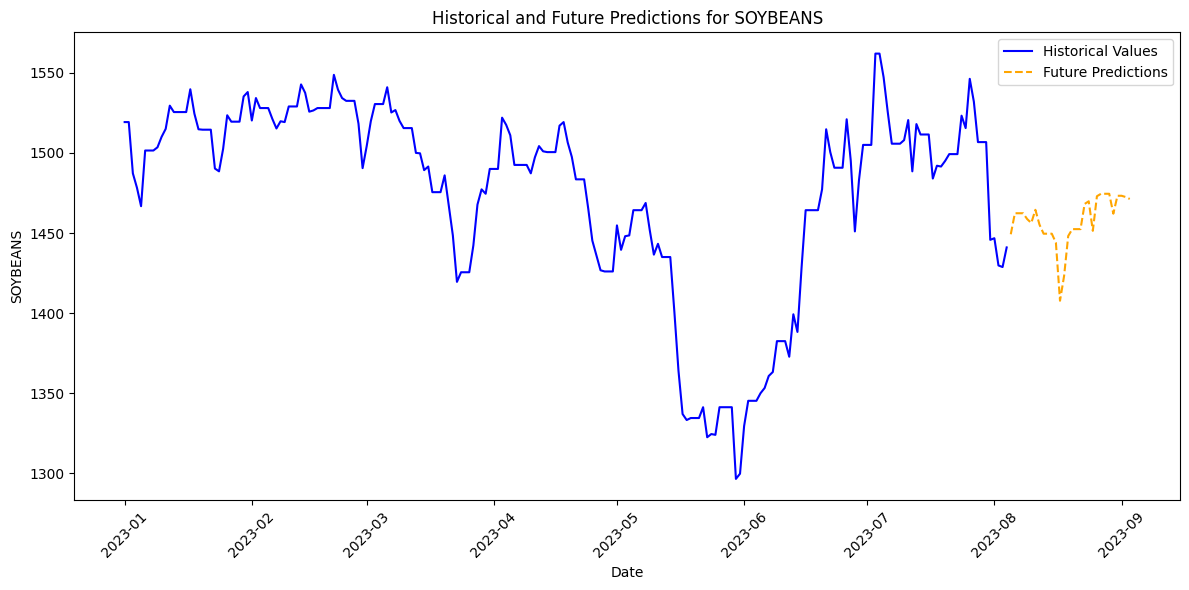

In [23]:
plt.figure(figsize=(12, 6))

# Plot historical values
plt.plot(df.index, df[target_column], label='Historical Values', color='blue')

# Plot future predictions
plt.plot(results['Date'], results[f'Predicted {target_column}'], label='Future Predictions', color='orange', linestyle='--')

plt.title(f"Historical and Future Predictions for {target_column}")
plt.xlabel("Date")
plt.ylabel(target_column)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
categories = {
    "Energy": [
        "Natural Gas",
        "Low Sulphur Gas Oil",
        "WTI Crude",
        "Brent Crude",
        "ULS Diesel",
        "Gasoline",
    ],
    "Industrial Metals": [
        "Copper",
        "Aluminum",
        "Zinc",
        "Nickel",
    ],
    "Precious Metals": [
        "Gold",
        "Silver",
    ],
    "Grains": [
        "Corn",
        "Soybeans",
        "Wheat",
        "Soybean Oil",
        "Soybean Meal",
        "HRW Wheat",
    ],
    "Livestock": [
        "Live cattle",
        "Lean Hogs",
    ],
    "Softs": [
        "Sugar",
        "Coffee",
        "Cotton",
    ],
}



In [25]:
# df = original_df.copy()
# df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
# date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# # Reindex the DataFrame to include all dates in the range
# df = df.set_index('Date').reindex(date_range).reset_index()

# # Rename the index column back to 'Date'
# df.rename(columns={'index': 'Date'}, inplace=True)
# df.reset_index(drop=True, inplace=True)

# # Ensure 'Date' is a datetime object and set as the index
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')
# df = df.ffill()
# df = df.bfill()

# # -------------------------
# df_2022 = df[df.index.year == 2022]
# df_2023 = df[df.index.year >= 2023]


# import matplotlib.dates as mdates

# plt.figure(figsize=(12, 6))

# # Plot historical values for 2022 as the base trend
# plt.plot(df_2022.index, df_2022[target_column], label='Historical Values 2022', color='blue')

# # Adjust 2023 dates to overlap with 2022
# df_2023_shifted = df_2023.copy()
# df_2023_shifted.index = df_2023_shifted.index.map(lambda x: x.replace(year=2022))

# # Adjust future predictions to overlap with 2022
# results_shifted = results.copy()
# results_shifted['Date'] = results_shifted['Date'].map(lambda x: x.replace(year=2022))

# # Plot 2023 values on the same x-axis
# plt.plot(df_2023_shifted.index, df_2023[target_column], label='Historical Values 2023', color='red', alpha=0.7)

# # Plot future predictions on the same x-axis
# plt.plot(results_shifted['Date'], results_shifted[f'Predicted {target_column}'], label='Future Predictions', color='orange', linestyle='--', alpha=0.7)

# # Title and labels
# plt.title(f"Historical and Future Predictions for {target_column} (Overlayed)")
# plt.xlabel("Date")
# plt.ylabel(target_column)
# plt.legend()

# # Format x-axis for 2022 (primary axis)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Display months only
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.xticks(rotation=45)

# # Add a secondary x-axis for the original 2023 and future prediction timeline
# sec_ax = plt.gca().twiny()

# # Use the original 2023 and results timeline for the secondary axis
# sec_ax.set_xlim(df_2023.index.min(), results['Date'].max())
# sec_ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# sec_ax.xaxis.set_major_locator(mdates.MonthLocator())
# sec_ax.set_xlabel("Date (2023 and Predictions)")

# plt.tight_layout()
# plt.show()

